In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from sklearn import feature_extraction, metrics, svm,model_selection
from IPython.display import Image
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import math
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline  


In [8]:
review_data = pd.read_csv('/home/dexterslaj/train-processed.csv', encoding='latin-1')
review_data.head(n=10)
#for x in review_data.itertuples():
    #print(x[3])


,Sno.,labels,Bookreviews
0,1,1,this was the first clive cussler ive ever read...
1,2,1,i liked the da vinci code a lot
2,3,1,i liked the da vinci code a lot
3,4,1,i liked the da vinci code but it ultimatly did...
4,5,1,thats not even an exaggeration and at midnight...
5,6,1,i loved the da vinci code but now i want somet...
6,7,1,i thought da vinci code was great same with ki...
7,8,1,the da vinci code is actually a good movie
8,9,1,i thought the da vinci code was a pretty good ...
9,10,1,the da vinci code is one of the most beautiful...


In [9]:
review_data.drop(['Sno.'],axis = 1,inplace=True)

In [10]:
review_data.head(n=10)

,labels,Bookreviews
0,1,this was the first clive cussler ive ever read...
1,1,i liked the da vinci code a lot
2,1,i liked the da vinci code a lot
3,1,i liked the da vinci code but it ultimatly did...
4,1,thats not even an exaggeration and at midnight...
5,1,i loved the da vinci code but now i want somet...
6,1,i thought da vinci code was great same with ki...
7,1,the da vinci code is actually a good movie
8,1,i thought the da vinci code was a pretty good ...
9,1,the da vinci code is one of the most beautiful...


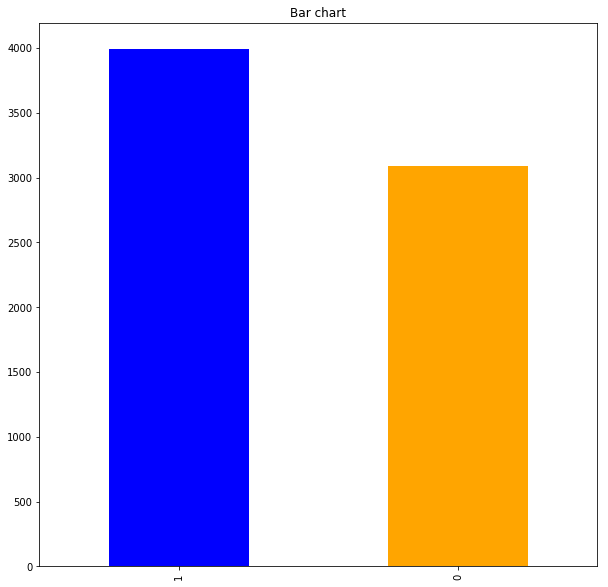

1    3994
0    3091
Name: labels, dtype: int64


In [11]:
count_Class=pd.value_counts(review_data["labels"], sort=True)
count_Class.plot(kind= 'bar', color= ["blue", "orange"],figsize=(10.0,10.0))
plt.title('Bar chart')
plt.show()
print(pd.value_counts(review_data['labels']))

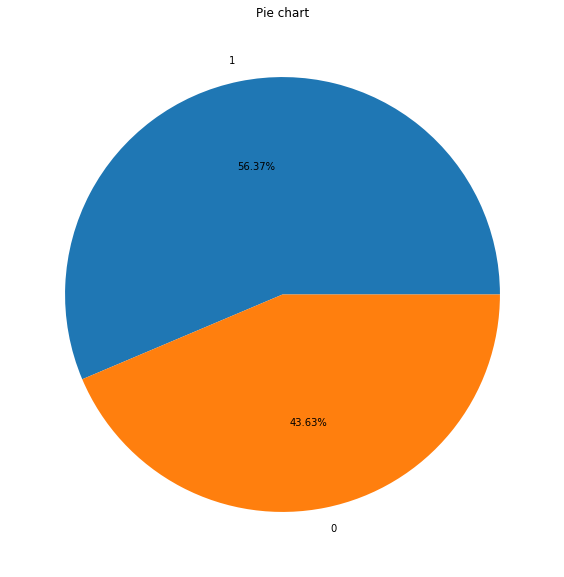

In [12]:
count_Class.plot(kind = 'pie',  autopct='%1.2f%%',figsize=(10.0,10.0))
plt.title('Pie chart')
plt.ylabel('')
plt.show()

In [13]:
count1 = Counter(" ".join(review_data[review_data["labels"]== 1]["Bookreviews"]).split())

df1 = pd.DataFrame.from_dict(count1,orient='index')
#print(df1)
df1 = df1.rename(columns={0: "wordscount", 1 : "count"})

print(df1)
count2 = Counter(" ".join(review_data[review_data['labels']==0]["Bookreviews"]).split())
df2 = pd.DataFrame.from_dict(count2,orient='index')
df2 = df2.rename(columns={0: "wordscount", 1 : "count_"})



                   wordscount
this                       99
was                       838
the                      1835
first                      97
clive                       1
cussler                     1
ive                         5
ever                        7
read                      101
but                       145
even                       12
books                      22
like                      871
relic                       1
and                       957
da                        998
vinci                     999
code                      994
were                      166
more                       90
plausible                   1
than                        8
i                        3222
liked                      99
a                         772
lot                        15
it                        404
ultimatly                   1
didnt                       2
seem                        1
...                       ...
scorebrokeback              1
score     

In [14]:
print(df2)

             wordscount
da                 1001
vinci              1001
code                997
was                 337
a                   533
terrible            174
movie               555
then                 92
again                 6
the                1387
is                  529
super                 2
shitty                4
and                1195
it                  316
made                  7
like                 23
million               1
comes                 1
out                 171
tomorrow              1
which               119
sucks               600
i                  1417
thought              14
really              188
boring               92
god                   6
yahoo                 1
games                 1
...                 ...
figures               1
fully                 1
clothed               1
year                  1
combonation           1
halfway               1
van                   1
insurance             1
runs                  1
soon            

In [34]:
#snowball= SnowballStemmer('english')

#stopwordslist=list(stopwords.words('english'))

In [15]:
import nltk

In [36]:
#nltk.download('stopwords')

In [16]:
snowball= SnowballStemmer('english')
porter=PorterStemmer()
c=" he is a naughtly boy. he is doing python pythonly in a pythonously better way"
c1=word_tokenize(c)
print(c1)
for x in c1:
    print(snowball.stem(x))
lemmatizer=WordNetLemmatizer()
stopwordslist=list(stopwords.words('english'))

['he', 'is', 'a', 'naughtly', 'boy', '.', 'he', 'is', 'doing', 'python', 'pythonly', 'in', 'a', 'pythonously', 'better', 'way']
he
is
a
naught
boy
.
he
is
do
python
python
in
a
python
better
way


In [17]:
print(stopwordslist)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [19]:
for x in stopwordslist:
    if x=='such':
        print (stopwordslist.index(x))

115


In [20]:
stopwordslist1=[]
for i in range(116):
    stopwordslist1.append(stopwordslist[i])

In [22]:
print(stopwordslist1)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such']


In [23]:
x=[]

for i in range(7085):
    x.append(str(i))

#print(x)    

In [24]:
vocabulary={'null'}
print(type(vocabulary))
for i in range(7085):
    temp_review=review_data.iloc[[i]]
    temp_message=str(temp_review[['Bookreviews']])
   # print(type(temp_message))
    tempwords=word_tokenize(temp_message)
    for w in tempwords:
        if  w  in x:
            tempwords.remove(w)
   # print (tempwords)  
    for w in tempwords:
        vocabulary |= set(tempwords)
print(len(vocabulary))        

<class 'set'>
1497


In [26]:
stemvocab=[]
for w in vocabulary:
    x=snowball.stem(w)
    #print(x)
    stemvocab.append(x)

In [27]:
print(len(stemvocab))
#print(vocabulary)
#print(stemvocab)

1497


In [28]:
lemvocab=[]
for w in vocabulary:
    x=lemmatizer.lemmatize(w)
    lemvocab.append(x)

In [29]:
#print (len(lemvocab))# 1479

In [30]:
#print(lemvocab)

In [35]:
stopvocab=[]
for w in vocabulary:
   # print(w)
    if w in stopwordslist1:
        continue
    else:    
        stopvocab.append(w)

In [36]:
#print(stopvocab)
#print(len(stopvocab))# 1379


In [37]:
stoplemvocab=[]
for w in stopvocab:
    x=lemmatizer.lemmatize(w)
    stoplemvocab.append(x)

In [47]:
#print(set(stoplemvocab))
#print(len(set(stoplemvocab)))# 1325
stoplemvocab1=set(stoplemvocab)

#print(stoplemvocab1)
stoplemvocabfile=open("stoplemvocab.txt","w+")
for x in stoplemvocab1:
    stoplemvocabfile.write(x+"\n")
    
#print(len(stoplemvocab1))
stoplemvocablist=list(stoplemvocab1)
#print(stoplemvocablist[2:9])


def messagetocountvector(x):
    
    messagevector=np.zeros(1351,dtype=int)
    temp1=word_tokenize(x)
    temp2=[]
    for x in temp1:
        x=lemmatizer.lemmatize(x)
        temp2.append(x)
    for x in temp2:
        if x in stopwordslist:
            temp2.remove(x)
            
    for x in temp2:
        if x in stoplemvocablist:
            i=stoplemvocablist.index(x)
            messagevector[i]+=1
            
    return list(messagevector)




In [39]:
countvect=feature_extraction.text.CountVectorizer(vocabulary=stoplemvocablist)
tfidfvect=feature_extraction.text.TfidfVectorizer()
tfidfvect_slv=feature_extraction.text.TfidfVectorizer(vocabulary=stoplemvocablist)

In [40]:

X_slv_cv=countvect.transform(review_data['Bookreviews'])

In [41]:
np.shape(X_slv_cv)# finally using countvectorizer we have vector matrix 

(7085, 1351)

In [42]:
X_train_cv, X_test_cv, y_train_cv, y_test_cv = model_selection.train_test_split(X_slv_cv, review_data['labels'], test_size=0.33, random_state=42)
print([np.shape(X_train_cv), np.shape(X_test_cv)])
print(type(y_train_cv))
#print(y_train_cv)
#x=np.array(y_train_cv)
print(x)
countp=0
countn=0
for p in x:
    if p==1:
        countp+=1
    else:
        countn+=1
print(countn)        

[(4746, 1351), (2339, 1351)]
<class 'pandas.core.series.Series'>
brigid
6


In [43]:
list_C = np.arange(5, 55, 5 ) #100000
score_train = np.zeros(len(list_C))
#print(score_train)
score_test = np.zeros(len(list_C))
recall_train = np.zeros(len(list_C))
recall_test = np.zeros(len(list_C))
precision_train= np.zeros(len(list_C))
precision_test=np.zeros(len(list_C))
count = 0
for C in list_C:
    svc = svm.SVC(C=C)
    svc.fit(X_train_cv, y_train_cv)
    #score_train[count] = svc.score(X_train_cv, y_train_cv)# returns accuracy over training set
   # print("accuracy for train set at c= ",C,"is ",score_train[count])
    score_test[count]= svc.score(X_test_cv, y_test_cv)# returns accuracy over test set
    #print(" ------------------------******************--------------------------")
    #print("accuracy for test set at c= ",C,"is ",score_test[count])
    #recall_train[count]=metrics.recall_score(y_train_cv,svc.predict(X_train_cv))
    recall_test[count] = metrics.recall_score(y_test_cv, svc.predict(X_test_cv))
   # precision_train[count] = metrics.precision_score(y_train_cv, svc.predict(X_train_cv))
    precision_test[count] = metrics.precision_score(y_test_cv, svc.predict(X_test_cv))
    count = count + 1 

In [44]:
matrix = np.matrix(np.c_[list_C, score_test, recall_test, precision_test])
models = pd.DataFrame(data = matrix, columns = 
             ['C', 'Test Accuracy', 'Test Recall', 'Test Precision'])
models.head(n=10)

,C,Test Accuracy,Test Recall,Test Precision
0,5.0,0.970073,0.976762,0.970939
1,10.0,0.968363,0.977511,0.967359
2,15.0,0.969645,0.978261,0.968820
3,20.0,0.970500,0.977511,0.970961
4,25.0,0.970928,0.976762,0.972388
5,30.0,0.972638,0.976762,0.975299
6,35.0,0.973493,0.976762,0.976762
7,40.0,0.973493,0.977511,0.976048
8,45.0,0.974348,0.977511,0.977511
9,50.0,0.974348,0.977511,0.977511


In [45]:
# confusion maricx--->
m_confusion_test = metrics.confusion_matrix(y_test_cv, svc.predict(X_test_cv))
pd.DataFrame(data = m_confusion_test, columns = ['Predicted 0', 'Predicted 1'],
            index = ['Actual 0', 'Actual 1'])


,Predicted 0,Predicted 1
Actual 0,975,30
Actual 1,30,1304


In [48]:
# testing above model for a unseen test set
message="i liked the book but it needs some more juice"
messagevectlist= messagetocountvector(message)
messagearray=np.array(messagevectlist)
messagematrix=np.matrix(messagearray)
svc.predict(messagematrix)

array([1])

In [49]:
# applying classifier on tfidf vectroizer
X_tfidf=tfidfvect.fit_transform(review_data['Bookreviews'])
np.shape(X_tfidf)
tfidffeaturelist=tfidfvect.get_feature_names()

In [50]:
#print(X_tfidf)
#print(tfidfvect.get_feature_names())

X_train_tf, X_test_tf, y_train_tf, y_test_tf = model_selection.train_test_split(X_tfidf, review_data['labels'], test_size=0.33, random_state=42)
print([np.shape(X_train_tf), np.shape(X_test_tf)])

[(4746, 2153), (2339, 2153)]


In [51]:
list_C = np.arange(1, 55, 2) #100000
score_train = np.zeros(len(list_C))
#print(score_train)
score_test = np.zeros(len(list_C))
recall_train = np.zeros(len(list_C))
recall_test = np.zeros(len(list_C))
precision_train= np.zeros(len(list_C))
precision_test=np.zeros(len(list_C))
count = 0
for C in list_C:
    svc_tf = svm.SVC(C=C)
    svc_tf.fit(X_train_tf, y_train_tf)
    
    #score_train[count] = svc.score(X_train_cv, y_train_cv)# returns accuracy over training set
   # print("accuracy for train set at c= ",C,"is ",score_train[count])
    score_test[count]= svc_tf.score(X_test_tf, y_test_tf)# returns accuracy over test set
    #print(" ------------------------******************--------------------------")
    #print("accuracy for test set at c= ",C,"is ",score_test[count])
    #recall_train[count]=metrics.recall_score(y_train_cv,svc.predict(X_train_cv))
    recall_test[count] = metrics.recall_score(y_test_tf, svc_tf.predict(X_test_tf))
   # precision_train[count] = metrics.precision_score(y_train_cv, svc.predict(X_train_cv))
    precision_test[count] = metrics.precision_score(y_test_tf, svc_tf.predict(X_test_tf))
    count = count + 1 
print(svc_tf.predict(X_test_tf))    

[1 0 1 ... 1 1 0]


In [53]:
matrix = np.matrix(np.c_[list_C, score_test, recall_test, precision_test])
models = pd.DataFrame(data = matrix, columns = 
             ['C', 'Test Accuracy', 'Test Recall', 'Test Precision'])
models.head(n=25)

,C,Test Accuracy,Test Recall,Test Precision
0,1.0,0.570329,1.000000,0.570329
1,3.0,0.570329,1.000000,0.570329
2,5.0,0.615220,1.000000,0.597135
3,7.0,0.845661,1.000000,0.787021
4,9.0,0.946986,1.000000,0.914952
5,11.0,0.965797,0.997001,0.945946
6,13.0,0.969218,0.991754,0.955925
7,15.0,0.970500,0.988006,0.961342
8,17.0,0.970500,0.986507,0.962692
9,19.0,0.971355,0.985757,0.964784


In [54]:
# confusion maricx--->
m_confusion_test = metrics.confusion_matrix(y_test_tf, svc_tf.predict(X_test_tf))
pd.DataFrame(data = m_confusion_test, columns = ['Predicted 0', 'Predicted 1'],
            index = ['Actual 0', 'Actual 1'])

,Predicted 0,Predicted 1
Actual 0,972,33
Actual 1,16,1318


In [55]:
masterdoc=" ".join(review_data['Bookreviews']).split()# list containing all words in all the documents
masterdoclist=list(set(masterdoc))
#print(len(masterdoclist)) # 2174
#print(Counter(masterdoclist))   
def messageto_tfidfvector(x):
    # calculating inverse transverse frequency 
    tempmessage1=x.split()
    for w in tempmessage1:
        if w.isalpha()==False:
            tempmessage1.remove(w)
   # print(tempmessage1)        
    messagetodict_count={}
    messagetodict_idf={}
    messagetodict_tf={}
    messagetodict_tfidf={}
   
    for w in tempmessage1:
        messagetodict_count[w]=0
        messagetodict_idf[w]=0
        messagetodict_tf[w]=0
        messagetodict_tfidf[w]=0
    #print(messagetodict_tf)
    # creating master document
    
    
    # counting number of inatances for each word i.e document frequency of each word
    for w in tempmessage1:
        i=masterdoc.count(w)
        messagetodict_count[w]=i
    # for any new word not in corpus we take its frequenct    
    for w in tempmessage1:
        if messagetodict_count[w]==0:
            messagetodict_count[w]=1
    
    # calculating idf
    for keys in messagetodict_count:
         messagetodict_idf[w]=math.log10(7085/ messagetodict_count[w])
    
    # calculating tf or transverse frequency
    
    for w in tempmessage1:
        i=tempmessage1.count(w)
        messagetodict_tf[w]=i/len(tempmessage1)
        
    # applying normalization to tf by taking a=0.4 
    #calculating max tf
    max_tf=0.0
    for keys in messagetodict_tf:
        if max_tf < messagetodict_tf[keys]:
            max_tf=messagetodict_tf[keys]
            
    a=0.4        
    for keys in messagetodict_tf:
            i=a+(1-a)*(messagetodict_tf[keys]/max_tf)
            messagetodict_tf[keys]=i
            
    #finally applying tf(w)*idf(w) 
    for keys in messagetodict_tfidf:
        messagetodict_tfidf[keys]=messagetodict_tf[keys]*messagetodict_idf[keys]
     
    # now converting this tfidf dict to a vector
    messagevector_tfidf=np.zeros(2174)
    for keys in messagetodict_tfidf:
        #i=masterdoclist.index(keys)
        i=-1
        for p in masterdoclist:  # actually for a unknown word we have no choice but to ignore it
            if keys==p:
                break
        i=masterdoclist.index(p)
        if i!=-1:       
            messagevector_tfidf[i]= messagetodict_tfidf[keys]
        else:
            continue
    #print(len(messagevector_tfidf)) 
    return list(messagevector_tfidf)



        

In [56]:
# training whole data set according to this tfidf
mytfidf_vector_matrix=np.zeros((7085,2174))
temp=[]
counter=0
for rows in review_data.itertuples():
    message=rows[2]
    
    temp=messageto_tfidfvector(message)
    #print(len(temp))
    for l in range(2174):
        mytfidf_vector_matrix[counter][l]=temp[l]
    counter+=1
    temp=[]
print(mytfidf_vector_matrix) 


[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [57]:
X_train_mytfidf, X_test_mytfidf, y_train_mytfidf, y_test_mytfidf = model_selection.train_test_split(mytfidf_vector_matrix, review_data['labels'], test_size=0.33, random_state=42)
print([np.shape(X_train_mytfidf), np.shape(X_test_mytfidf)])


[(4746, 2174), (2339, 2174)]


In [58]:
#list_C = np.arange(500, 1000, 100) #100000
#score_train = np.zeros(len(list_C))
#print(score_train)
score_test_mytfidf = np.zeros(4)
recall_test_mytfidf = np.zeros(4)
precision_test_mytfidf=np.zeros(4)
count = 0


kernels=['rbf','linear','poly','sigmoid']
for k in kernels:
     #for C in list_C:
      #  print(C)
        print("CURRENT KERNEL IS ",k)
        svc_mytfidf = svm.SVC(C=10,kernel=k)
        svc_mytfidf.fit(X_train_mytfidf, y_train_mytfidf)
    
       #score_train[count] = svc.score(X_train_cv, y_train_cv)# returns accuracy over training set
       # print("accuracy for train set at c= ",C,"is ",score_train[count])
        score_test_mytfidf[count]= svc_mytfidf.score(X_test_mytfidf, y_test_mytfidf)# returns accuracy over test set
        #print(" ------------------------******************--------------------------")
        #print("accuracy for test set at c= ",C,"is ",score_test[count])
         #recall_train[count]=metrics.recall_score(y_train_cv,svc.predict(X_train_cv))
        recall_test_mytfidf[count] = metrics.recall_score(y_test_mytfidf, svc_mytfidf.predict(X_test_mytfidf))
        # precision_train[count] = metrics.precision_score(y_train_cv, svc.predict(X_train_cv))
        precision_test_mytfidf[count] = metrics.precision_score(y_test_mytfidf, svc_mytfidf.predict(X_test_mytfidf))
        count = count + 1 
        m_confusion_test = metrics.confusion_matrix(y_test_mytfidf, svc_mytfidf.predict(X_test_mytfidf))
        print( pd.DataFrame(data = m_confusion_test, columns = ['Predicted 0', 'Predicted 1'],
            index = ['Actual 0', 'Actual 1']))
        
#print(svc_tf.predict(X_test_tf))    

CURRENT KERNEL IS  rbf
          Predicted 0  Predicted 1
Actual 0          724          281
Actual 1           68         1266
CURRENT KERNEL IS  linear
          Predicted 0  Predicted 1
Actual 0          762          243
Actual 1           85         1249
CURRENT KERNEL IS  poly
          Predicted 0  Predicted 1
Actual 0            0         1005
Actual 1            0         1334
CURRENT KERNEL IS  sigmoid
          Predicted 0  Predicted 1
Actual 0          377          628
Actual 1            0         1334


In [62]:
# testing against some unseen data..
message="it reminds me of my mom"
messagevectlist= messageto_tfidfvector(message)
messagearray=np.array(messagevectlist)
messagematrix=np.matrix(messagearray)
svc_mytfidf.predict(messagematrix)

array([1])